# **Домашнее задание 7: Fraud Detection Competition**

Добро пожаловать на финальное домашнее задание курса! Домашнее задание направлено на систематизацию всех знаний, полученных в процессе учебы.

В нём Вы потренируетесь применять навыки построения пайплайнов машинного обучения, приобретенные в курсе от точки разведочного анализа данных до построения и валидации моделей машинного обучения.

## **Задача**
**Вы будете решать задачу определения фрода:**

https://www.kaggle.com/competitions/fraud-detection-24

**Вам нужно будет:**
- в jupyter notebook провести исследование данных;
- в нём же построить модели и оценить их качество;
- отправить посылку на Kaggle.

Более подробное описание шагов - в ноутбуке ниже.

## **Оценивание и баллы**
- В EDA и во всей работе будут оцениваться полнота и **выводы**;
- При обучении моделей старайтесь обоснованно подходить к их выбору, избегая простого перебора;

**Максимальный балл** - 10 (+ бонусы за Kaggle, см. ниже).


Мягкий дедлайн (окончание соревнования на Kaggle): **15 марта 23:59**


# **Базовое решение и пример формирования файла под submission**


In [ ]:
!wget --no-check-certificate 'https://www.dropbox.com/s/5iuef7c9ljj84t6/train_transaction.csv?dl=0' -O train_transaction.csv
!wget --no-check-certificate 'https://www.dropbox.com/s/cmy01z5fw7ohlmd/train_identity.csv?dl=0' -O train_identity.csv
!wget --no-check-certificate 'https://www.dropbox.com/s/7thqkuxnwsa7njj/test_transaction.csv?dl=0' -O test_transaction.csv
!wget --no-check-certificate 'https://www.dropbox.com/s/b40nvbb9e2usd5w/test_identity.csv?dl=0' -O test_identity.csv
!wget --no-check-certificate 'https://www.dropbox.com/s/arkyoz0bel8z4d2/sample_submission.csv?dl=0' -O sample_submission.csv

--2025-03-10 18:20:27--  https://www.dropbox.com/s/5iuef7c9ljj84t6/train_transaction.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/puoen4suxjebjteenuwtm/train_transaction.csv?rlkey=madfflananln1b7qysdq8c54q&dl=0 [following]
--2025-03-10 18:20:27--  https://www.dropbox.com/scl/fi/puoen4suxjebjteenuwtm/train_transaction.csv?rlkey=madfflananln1b7qysdq8c54q&dl=0
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc6dc5e6e9ab5284a9b046244971.dl.dropboxusercontent.com/cd/0/inline/ClmTrQ8hReyM1maymrQ1jmeeqShdXb5sIAiTjgRy-6xFzQwAhl5b4Cb9iTO4ufhsbxKdouNHckKY1kqQ0G-V93sZn1qA1KPLTJT9H6jAgk-DZ_rcs8Al785chDZkxcFvr8x6xXVKAwsw4tGl7B_J9Epo/file# [following]
--2025-03-10 18:20:27--  https://uc6dc5e6e9ab5284a9b0462449

In [ ]:
!pip install catboost -q

In [ ]:
from catboost import CatBoostClassifier
import pandas as pd
import os
from tqdm import tqdm

INPUT_DIR = '.'

train_transaction = pd.read_csv(os.path.join(INPUT_DIR, 'train_transaction.csv'))
train_identity = pd.read_csv(os.path.join(INPUT_DIR, 'train_identity.csv'))
test_transaction = pd.read_csv(os.path.join(INPUT_DIR, 'test_transaction.csv'))
test_identity = pd.read_csv(os.path.join(INPUT_DIR, 'test_identity.csv'))
sample_submission = pd.read_csv(os.path.join(INPUT_DIR, 'sample_submission.csv'))

df_train = train_transaction.merge(train_identity, how='left', on='TransactionID')

df_test = test_transaction.merge(test_identity, how='left', on='TransactionID')

In [ ]:
df_train.drop(['TransactionID', 'TransactionDT'], axis=1, inplace=True)
df_test.drop(['TransactionID', 'TransactionDT'], axis=1, inplace=True)
df_train.shape, df_test.shape

((417559, 432), (172981, 431))

In [ ]:
object_cols = []
for idx, col in tqdm(enumerate(df_train.columns.drop('isFraud'))):
    if df_train[col].dtype == 'O':
      object_cols.append(idx)

431it [00:00, 23951.89it/s]


In [ ]:
object_cols

[1,
 5,
 7,
 12,
 13,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 402,
 405,
 406,
 413,
 417,
 418,
 419,
 420,
 421,
 423,
 424,
 425,
 426,
 427,
 428,
 429,
 430]

In [ ]:
df_train

,isFraud,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,0,68.500,W,13926,NaN,150.0,discover,142.0,credit,315.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,29.000,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,59.000,W,4663,490.0,150.0,visa,166.0,debit,330.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,50.000,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,50.000,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417554,0,335.000,W,2538,476.0,150.0,visa,166.0,debit,126.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
417555,0,160.500,W,6019,583.0,150.0,visa,226.0,credit,269.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
417556,0,230.079,C,5059,138.0,200.0,visa,226.0,debit,NaN,...,chrome 65.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,SM-A320FL Build/NRD90M
417557,0,105.000,W,6697,111.0,150.0,visa,195.0,debit,299.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print(df_test.isna().sum())

TransactionAmt         0
ProductCD              0
card1                  0
card2               2370
card3                744
                   ...  
id_36             140269
id_37             140269
id_38             140269
DeviceType        140295
DeviceInfo        146274
Length: 431, dtype: int64


In [ ]:
X_train = df_train.drop('isFraud', axis=1)
X_train = X_train.fillna('')
y_train = df_train['isFraud'].values

cb = CatBoostClassifier(iterations=3)
cb.fit(X_train, y_train, object_cols, )

Learning rate set to 0.5
0:	learn: 0.2082395	total: 762ms	remaining: 1.52s
1:	learn: 0.1360790	total: 1.29s	remaining: 646ms
2:	learn: 0.1180984	total: 1.92s	remaining: 0us


In [ ]:
predictions = cb.predict_proba(df_test.fillna(''))

In [ ]:
sub = pd.DataFrame({'TransactionID': sample_submission['TransactionID'], 'isFraud': predictions[:, 0]})
sub.head()

,TransactionID,isFraud
0,3404559,0.978714
1,3404560,0.935724
2,3404561,0.946864
3,3404562,0.978714
4,3404563,0.970637


In [ ]:
# Сохранение submission
sub.to_csv('submission_baseline.csv', index=False)

### **Примечания:**

**1. Оценка качества и Submission File**
- Ответом является число от 0 до 1, метрикой качества - AUC-ROC.
- Структура Submission File:
 - для каждого значения *TransactionID* в тестовых данных вы должны предсказать **вероятность** для столбца *isFraud*.
 - в файле у вас должно быть две колонки: `TransactionID` и`isFraud`  **для каждой транзакции в датасете**.

**2. Объем данных**

Поскольку набор данных объемный, могут быть проблемы с переполнением памяти в Collab. Для решения проблемы можете использовать функцию из [этого ноутбука](https://colab.research.google.com/drive/18u75eyFGEoyeWJ_MbsLkcPa6gv2tNI8G#scrollTo=V2L1Nl5CTMMl), разобравшись, что она делает с данными.

# **Задание 1 (2 балла)**

Проведите EDA (разведочный анализ данных):
* проанализируйте признаки, их особенности и связь с целевой переменной
* проанализируйте целевую переменную
* оцените степень попарной взаимосвязи признаков, а также связи признаков и целевой переменной
* по результатам исследований сделайте необходимую обработку данных (удаление дублей, работа с пропусками, с категориальными столбцами (если они есть), работа с аномалиями, другие преобразования признаков)

Важно, что EDA всегда сопровождается выводами - не забудьте об этом.

Для начала посмотрим на данные с целью понять, что они из себя представляют



In [ ]:
df_train

,isFraud,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,0,68.500,W,13926,NaN,150.0,discover,142.0,credit,315.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,29.000,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,59.000,W,4663,490.0,150.0,visa,166.0,debit,330.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,50.000,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,50.000,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417554,0,335.000,W,2538,476.0,150.0,visa,166.0,debit,126.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
417555,0,160.500,W,6019,583.0,150.0,visa,226.0,credit,269.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
417556,0,230.079,C,5059,138.0,200.0,visa,226.0,debit,NaN,...,chrome 65.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,SM-A320FL Build/NRD90M
417557,0,105.000,W,6697,111.0,150.0,visa,195.0,debit,299.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Видим множество колонок, как числовых, так и категориальных. Посмотрим на распределение целевой переменной

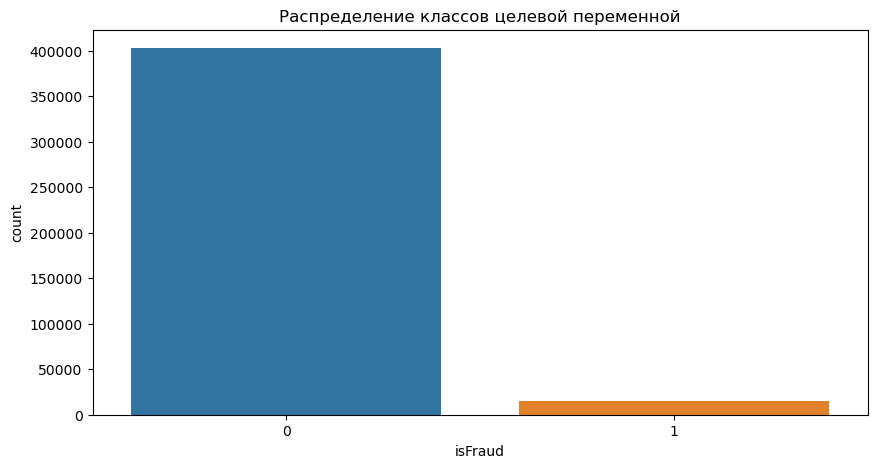

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 5))
sns.countplot(data=df_train, x='isFraud')
plt.title("Распределение классов целевой переменной")
plt.show()

0 - порядка 400000 строк

1 - порядка 15000 строк

В таком случае всегда надо будет делать стратификацию по целевой переменной и использовать метрику ROC-AUC

Выведем столбцы, которые имеют высокую корреляцию с целевой переменной

In [ ]:
numerical_features = df_train.select_dtypes(include=[np.number]).columns.tolist()

corr_matrix = df_train[numerical_features + ['isFraud']].corr()
corr_pairs = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .reset_index()
)
corr_pairs.columns = ['Признак 1', 'Признак 2', 'Корреляция']

corr_pairs = corr_pairs.reindex(corr_pairs['Корреляция'].abs().sort_values(ascending=False).index)

for _, row in corr_pairs.iterrows():
    if row['Признак 1'] == "isFraud" or row['Признак 2'] == "isFraud":
        print(f"{row['Признак 1']} - {row['Признак 2']}: {row['Корреляция']:.2f}")


isFraud - isFraud: 1.00
V257 - isFraud: 0.37
isFraud - V257: 0.37
V244 - isFraud: 0.36
isFraud - V244: 0.36
isFraud - V242: 0.35
V242 - isFraud: 0.35
V246 - isFraud: 0.35
isFraud - V246: 0.35
isFraud - V201: 0.33
V201 - isFraud: 0.33
V200 - isFraud: 0.31
isFraud - V200: 0.31
V233 - isFraud: 0.31
isFraud - V233: 0.31
isFraud - V188: 0.31
V188 - isFraud: 0.31
isFraud - V189: 0.30
V189 - isFraud: 0.30
isFraud - V232: 0.29
V232 - isFraud: 0.29
V231 - isFraud: 0.29
isFraud - V231: 0.29
isFraud - V156: 0.29
V156 - isFraud: 0.29
V158 - isFraud: 0.29
isFraud - V158: 0.29
V149 - isFraud: 0.28
isFraud - V149: 0.28
isFraud - V217: 0.28
V217 - isFraud: 0.28
isFraud - V45: 0.28
V45 - isFraud: 0.28
isFraud - V258: 0.27
V258 - isFraud: 0.27
isFraud - V44: 0.26
V44 - isFraud: 0.26
isFraud - V171: 0.26
V171 - isFraud: 0.26
V228 - isFraud: 0.25
isFraud - V228: 0.25
isFraud - V87: 0.25
V87 - isFraud: 0.25
V86 - isFraud: 0.25
isFraud - V86: 0.25
isFraud - V147: 0.24
V147 - isFraud: 0.24
isFraud - V155: 0.

Максимальная корреляция равна 0.37, что не так много, поэтому удалять столбцы мы пока не будем

Удалим из df_train дубликаты

In [ ]:
print(df_train.shape)
df_train.drop_duplicates(inplace=True)
print(df_train.shape)

(417559, 432)
(417289, 432)


Удалили 270 дубликатов. Неплохой результат

Посмотрим, сколько есть пропусков в колонках

In [ ]:
print("Числовые колонки")
for col in numerical_features:
    print(col, df_train[col].isnull().sum())

categorical_features = df_train.select_dtypes(include=['object', 'category']).columns.tolist()

print("Категориальные колонки")
for col in categorical_features:
    print(col, df_train[col].isnull().sum())

Числовые колонки
isFraud 0
TransactionAmt 0
card1 0
card2 6560
card3 821
card5 2980
addr1 47947
addr2 47947
dist1 257828
dist2 388003
C1 0
C2 0
C3 0
C4 0
C5 0
C6 0
C7 0
C8 0
C9 0
C10 0
C11 0
C12 0
C13 0
C14 0
D1 274
D2 207922
D3 196186
D4 123018
D5 225567
D6 364256
D7 390343
D8 360735
D9 360735
D10 61484
D11 226580
D12 369559
D13 372823
D14 371949
D15 68630
V1 226580
V2 226580
V3 226580
V4 226580
V5 226580
V6 226580
V7 226580
V8 226580
V9 226580
V10 226580
V11 226580
V12 61512
V13 61512
V14 61512
V15 61512
V16 61512
V17 61512
V18 61512
V19 61512
V20 61512
V21 61512
V22 61512
V23 61512
V24 61512
V25 61512
V26 61512
V27 61512
V28 61512
V29 61512
V30 61512
V31 61512
V32 61512
V33 61512
V34 61512
V35 123047
V36 123047
V37 123047
V38 123047
V39 123047
V40 123047
V41 123047
V42 123047
V43 123047
V44 123047
V45 123047
V46 123047
V47 123047
V48 123047
V49 123047
V50 123047
V51 123047
V52 123047
V53 62885
V54 62885
V55 62885
V56 62885
V57 62885
V58 62885
V59 62885
V60 62885
V61 62885
V62 62885


Заполним пропуски в числовых столбцах средним значением, а в категориальных самым частым значением

In [ ]:
numerical_features = df_train.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = df_train.select_dtypes(include=['object', 'category']).columns.tolist()

# Для числовых признаков – заполнение средним значением
for col in numerical_features:
    if df_train[col].isnull().sum() > 0:
        df_train[col].fillna(df_train[col].mean(), inplace=True)
    if col != 'isFraud':
            if df_test[col].isnull().sum() > 0:
                df_test[col].fillna(df_test[col].mean(), inplace=True)
# Для категориальных признаков – заполнение наиболее частым значением
for col in categorical_features:
    if df_train[col].isnull().sum() > 0:
        df_train[col].fillna(df_train[col].mode()[0], inplace=True)
    if df_test[col].isnull().sum() > 0:
        df_test[col].fillna(df_test[col].mode()[0], inplace=True)


In [ ]:
print(sum(df_train.isna().sum()))
print(sum(df_test.isna().sum()))

0
0


Ура, пропусков больше нет
##Выводы по EDA##
1. 3.5% строк d df_train имеют isFraud = 1
2. Высокой корреляции с isFraud у колонок нет
3. Удалили 290 дублирующихся строк
4. Заполнили пропуски в колонках

# **Задание 2 (3 балла)**

Обучите несколько ML-моделей для решения поставленной задачи.
Оцените их качество двумя способами:

1) на кросс-валидации

2) на лидерборде

Подберите число фолдов на кросс-валидации так, чтобы метрики, которые вы видите, были максимально близки на кросс-валидации и на лидерборде.

По результатам экспериментов постройте таблицу:
* в каждой строке таблицы - результаты одной модели
* по столбцам: качество на кросс-валидации, качество на лидерборде, модель с гиперпараметрами

Полученную таблицу вставьте картинкой прямо в ноутбук после ячеек с кодом. Сделайте текстовые выводы.

In [ ]:
!pip install catboost -q
!pip install xgboost -q


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import time
import warnings
warnings.filterwarnings("ignore")

Сделаем функцию, которая будет на вход будет применять натренированную модель, X и y. На выходе лучшее значение roc_auc и лучшее количество фолдов. Функция должна прогонять кросс-валидацию по различному числу фолдов и выводить лучшее значение

In [ ]:
def evaluate_model_cv(model, X_train, y_train, folds_candidates=[3, 5, 7, 10]):
    best_cv = -np.inf
    best_fold = None
    for n_folds in folds_candidates:
        cv = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)
        cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='roc_auc', verbose = 2, n_jobs = -1)
        cv_mean = np.mean(cv_scores)
        if cv_mean > best_cv:
            best_cv = cv_mean
            best_fold = n_folds
    return best_cv, best_fold

Разделим df_train на тренировочную и валидационную выборки. Затем пребразуем все не числовые колонки к типу category

In [ ]:
time0 = time.time()
X_train_models, X_val_models, y_train_models, y_val_models = train_test_split(
    df_train.drop(columns=['isFraud']),
    df_train['isFraud'],
    test_size=0.3,
    random_state=42,
    stratify=df_train['isFraud']
)
time1 = time.time()
print(f'Разделение на train и val {time1 - time0} секунд')

Разделение на train и val 4.945012331008911 секунд


In [ ]:
for col in categorical_features:
    X_train_models[col] = X_train_models[col].astype('category')
    X_val_models[col] = X_val_models[col].astype('category')
    df_test[col] = df_test[col].astype('category')
    df_train[col] = df_train[col].astype('category')

Флаг is_gpu нужен с закладкой на будущее, когда будет возможно обучение на GPU

In [ ]:
is_gpu = False

Обучим CatBoostClassifier, XGBoostClassifier и LightGBMClassifier на тренировочных данных и выведем лучшее значение по фолдам. Все результаты будут в конце

In [ ]:
# --- CatBoost ---
catboost_params = {
    'iterations': 100,
    'learning_rate': 0.1,
    'depth': 6,
    'verbose': 0,
    'cat_features': categorical_features
}
if is_gpu:
    catboost_params['task_type'] = 'GPU'
    catboost_params['devices'] = '0'
cat_model_classic = CatBoostClassifier(**catboost_params)
time2 = time.time()
cv_score, best_fold = evaluate_model_cv(cat_model_classic, X_train_models, y_train_models)
time3 = time.time()

print(f'CatBoostClassifier {time3 - time2} секунд')
print(f'CatBoost (CV folds: {best_fold})')
print(f'ROC AUC: {cv_score}')
print(f'Гиперпараметры: {catboost_params}')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   55.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:  1.4min remaining:   55.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.4min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   7 | elapsed:  2.0min remaining:  1.5min
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:  2.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:  2.8min remaining:  2.8min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  2.9min finished


CatBoostClassifier 435.2448365688324 секунд
CatBoost (CV folds: 7)
ROC AUC: 0.8876107239468235
Гиперпараметры: {'iterations': 100, 'learning_rate': 0.1, 'depth': 6, 'verbose': 0, 'cat_features': ['ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'id_12', 'id_15', 'id_16', 'id_23', 'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType', 'DeviceInfo']}


In [ ]:
# --- XGBoost ---
xgb_params = {
    'n_estimators': 100,
    'learning_rate': 0.1,
    'max_depth': 6,
    'use_label_encoder': False,
    'eval_metric': 'logloss',
    'enable_categorical': True,
    'tree_method': 'gpu_hist' if is_gpu else 'auto'
}
xgb_model = XGBClassifier(**xgb_params, random_state=42)

time4 = time.time()
cv_score, best_fold = evaluate_model_cv(xgb_model, X_train_models, y_train_models)
time5 = time.time()
print(f'xgb_model {time5 - time4} секунд')

print(f'XGBoost (CV folds: {best_fold})')
print(f'ROC AUC: {cv_score}')
print(f'Гиперпараметры: {xgb_params}')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   34.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   44.7s remaining:   29.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   45.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   7 | elapsed:   59.9s remaining:   44.9s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:  1.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:  1.3min remaining:  1.3min


xgb_model 220.00108003616333 секунд
XGBoost (CV folds: 10)
ROC AUC: 0.9208699642215687
Гиперпараметры: {'n_estimators': 100, 'learning_rate': 0.1, 'max_depth': 6, 'use_label_encoder': False, 'eval_metric': 'logloss', 'enable_categorical': True, 'tree_method': 'auto'}


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.3min finished


In [ ]:
# --- LightGBM ---
lgb_params = {
    'n_estimators': 100,
    'learning_rate': 0.1,
    'max_depth': 6
}
if is_gpu:
    lgb_params['device'] = 'gpu'
lgb_model = LGBMClassifier(**lgb_params, random_state=42)
time6 = time.time()
cv_score, best_fold = evaluate_model_cv(lgb_model, X_train_models, y_train_models)
time7= time.time()

print(f'lgb_model {time7- time6} секунд')
print(f'LightGBM (CV folds: {best_fold})')
print(f'ROC AUC: {cv_score}')
print(f'Гиперпараметры: {lgb_params}')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   28.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   46.4s remaining:   30.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   47.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   7 | elapsed:   54.9s remaining:   41.2s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:   57.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:  2.2min remaining:  2.2min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  2.3min finished


lgb_model 270.946741104126 секунд
LightGBM (CV folds: 10)
ROC AUC: 0.9208992915162145
Гиперпараметры: {'n_estimators': 100, 'learning_rate': 0.1, 'max_depth': 6}


Прогоним те же модели через Optuna с целью поиска лучших гиперпараметров

In [ ]:
!pip install optuna -q

In [ ]:
import optuna
import logging

optuna.logging.set_verbosity(optuna.logging.INFO)
logging.getLogger('lightgbm').setLevel(logging.ERROR)

# --- Optuna для CatBoost ---
def objective_cat(trial):
    params = {
        'iterations': trial.suggest_int("iterations", 100, 300),
        'learning_rate': trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        'depth': trial.suggest_int("depth", 4, 10),
        'l2_leaf_reg': trial.suggest_float("l2_leaf_reg", 1, 10),
        'verbose': 0,
        'cat_features': categorical_features
    }
    if is_gpu:
        params['task_type'] = 'GPU'
        params['devices'] = '0'
    model = CatBoostClassifier(**params)
    cv = StratifiedKFold(n_splits=7, shuffle=True, random_state=42)
    cv_scores = cross_val_score(model, X_train_models, y_train_models, cv=cv, scoring='roc_auc')
    return np.mean(cv_scores)

time0 = time.time()
study_cat = optuna.create_study(direction='maximize')
study_cat.optimize(objective_cat, n_trials=20, n_jobs = -1)
best_params_cat = study_cat.best_params

time1 = time.time()
print(f"Время на подбор гиперпараметров {time1-time0} секунд")

[I 2025-03-13 00:51:16,095] A new study created in memory with name: no-name-2d91757a-4bca-4698-96a0-169fc2dc086d
[I 2025-03-13 03:15:03,029] Trial 8 finished with value: 0.861913242353868 and parameters: {'iterations': 122, 'learning_rate': 0.023484124227572397, 'depth': 5, 'l2_leaf_reg': 7.867580984247187}. Best is trial 8 with value: 0.861913242353868.
[I 2025-03-13 03:23:41,601] Trial 6 finished with value: 0.8691768693339095 and parameters: {'iterations': 125, 'learning_rate': 0.02635616963438111, 'depth': 6, 'l2_leaf_reg': 4.529092957844599}. Best is trial 6 with value: 0.8691768693339095.
[I 2025-03-13 03:36:39,927] Trial 0 finished with value: 0.8633487672729644 and parameters: {'iterations': 141, 'learning_rate': 0.015545697730056348, 'depth': 6, 'l2_leaf_reg': 7.0136835867743725}. Best is trial 6 with value: 0.8691768693339095.
[I 2025-03-13 03:45:43,272] Trial 10 finished with value: 0.8828833008461491 and parameters: {'iterations': 148, 'learning_rate': 0.048971440238259334

Время на подбор гиперпараметров 30749.821392536163 секунд


In [ ]:
best_params_cat['cat_features'] = categorical_features
cat_model_opt = CatBoostClassifier(**best_params_cat, verbose=0)
if is_gpu:
    cat_model_opt.set_params(task_type='GPU', devices='0')
time0 = time.time()
cv_score = np.mean(cross_val_score(cat_model_opt, X_val_models, y_val_models, cv=StratifiedKFold(n_splits=7, shuffle=True, random_state=42), scoring='roc_auc'))

time1 = time.time()
print(f"Время на кросс-валидацию {time1-time0} секунд")

print(f'CatBoost optuna (CV folds: 7)')
print(f'ROC AUC: {cv_score}')
print(f'Гиперпараметры: {best_params_cat}')

Время на кросс-валидацию 1004.597706079483 секунд
CatBoost optuna (CV folds: 7)
ROC AUC: 0.9070578985942512
Гиперпараметры: {'iterations': 103, 'learning_rate': 0.24282294822917122, 'depth': 10, 'l2_leaf_reg': 3.779165696356026, 'cat_features': ['ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'id_12', 'id_15', 'id_16', 'id_23', 'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType', 'DeviceInfo']}


In [ ]:
# --- Optuna для XGBoost ---
def objective_xgb(trial):
    params = {
        'n_estimators': trial.suggest_int("n_estimators", 100, 300),
        'learning_rate': trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        'max_depth': trial.suggest_int("max_depth", 4, 10),
        'subsample': trial.suggest_float("subsample", 0.6, 1.0),
        'colsample_bytree': trial.suggest_float("colsample_bytree", 0.6, 1.0),
        'use_label_encoder': False,
        'enable_categorical': True,
        'eval_metric': 'logloss',
        'tree_method': 'gpu_hist' if is_gpu else 'auto'
    }
    model = XGBClassifier(**params, random_state=42)
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    cv_scores = cross_val_score(model, X_train_models, y_train_models, cv=cv, scoring='roc_auc')
    return np.mean(cv_scores)


time0 = time.time()
study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective_xgb, n_trials=20, n_jobs = -1)
best_params_xgb = study_xgb.best_params
time1 = time.time()
print(f"Время на подбор гиперпараметров {time1-time0} секунд")

[I 2025-03-13 09:40:30,561] A new study created in memory with name: no-name-38ea1223-4be4-479f-a2ca-bd7a1cb25807
[I 2025-03-13 10:04:00,956] Trial 11 finished with value: 0.9216572008796335 and parameters: {'n_estimators': 156, 'learning_rate': 0.20083476144568935, 'max_depth': 4, 'subsample': 0.9179886123201325, 'colsample_bytree': 0.8964782338716029}. Best is trial 11 with value: 0.9216572008796335.
[I 2025-03-13 10:08:02,904] Trial 6 finished with value: 0.9416628817315058 and parameters: {'n_estimators': 109, 'learning_rate': 0.13619540497037058, 'max_depth': 8, 'subsample': 0.8393363668216947, 'colsample_bytree': 0.7539991737033194}. Best is trial 6 with value: 0.9416628817315058.
[I 2025-03-13 10:11:47,877] Trial 9 finished with value: 0.8763536389648563 and parameters: {'n_estimators': 164, 'learning_rate': 0.010055802078164533, 'max_depth': 6, 'subsample': 0.9010358108319958, 'colsample_bytree': 0.8265081867405167}. Best is trial 6 with value: 0.9416628817315058.
[I 2025-03-13

Время на подбор гиперпараметров 4455.307084083557 секунд


In [ ]:
best_params_xgb['use_label_encoder'] = False
best_params_xgb['enable_categorical'] = True
best_params_xgb['eval_metric'] = 'logloss'
best_params_xgb['tree_method'] = 'gpu_hist' if is_gpu else 'auto'


xgb_model_opt = XGBClassifier(**best_params_xgb, random_state=42)
cv_score = np.mean(cross_val_score(xgb_model_opt, X_val_models, y_val_models, cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42), scoring='roc_auc'))

print(f'XGBoost optuna (CV folds: 10)')
print(f'ROC AUC: {cv_score}')
print(f'Гиперпараметры: {best_params_xgb}')

XGBoost optuna (CV folds: 10)
ROC AUC: 0.9279790072070118
Гиперпараметры: {'n_estimators': 278, 'learning_rate': 0.1843604025221777, 'max_depth': 9, 'subsample': 0.9054759656282055, 'colsample_bytree': 0.9403138327018291, 'use_label_encoder': False, 'enable_categorical': True, 'eval_metric': 'logloss', 'tree_method': 'auto'}


In [ ]:
# --- Optuna для LightGBM ---
def objective_lgb(trial):
    params = {
        'n_estimators': trial.suggest_int("n_estimators", 100, 300),
        'learning_rate': trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        'max_depth': trial.suggest_int("max_depth", 4, 10),
        'num_leaves': trial.suggest_int("num_leaves", 20, 150),
        'subsample': trial.suggest_float("subsample", 0.6, 1.0),
        'colsample_bytree': trial.suggest_float("colsample_bytree", 0.6, 1.0)
    }
    if is_gpu:
        params['device'] = 'gpu'
    model = LGBMClassifier(**params, random_state=42)
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    cv_scores = cross_val_score(model, X_train_models, y_train_models, cv=cv, scoring='roc_auc')
    return np.mean(cv_scores)
time0 = time.time()
study_lgb = optuna.create_study(direction='maximize')
study_lgb.optimize(objective_lgb, n_trials=20, n_jobs = -1)
best_params_lgb = study_lgb.best_params
time1 = time.time()
print(f"Время на подбор гиперпараметров {time1-time0} секунд")


[I 2025-03-12 23:24:11,766] A new study created in memory with name: no-name-0daa271f-16dc-49bf-a486-dfed2aa94fa5
[I 2025-03-12 23:47:40,647] Trial 10 finished with value: 0.9085386928471614 and parameters: {'n_estimators': 130, 'learning_rate': 0.02154378161353555, 'max_depth': 9, 'num_leaves': 51, 'subsample': 0.7642759667060226, 'colsample_bytree': 0.6302702067714753}. Best is trial 10 with value: 0.9085386928471614.
[I 2025-03-12 23:47:44,387] Trial 3 finished with value: 0.9337006917733449 and parameters: {'n_estimators': 252, 'learning_rate': 0.09535194052452588, 'max_depth': 6, 'num_leaves': 27, 'subsample': 0.6554266801457715, 'colsample_bytree': 0.9660410463599379}. Best is trial 3 with value: 0.9337006917733449.
[I 2025-03-12 23:47:51,772] Trial 2 finished with value: 0.92929265374965 and parameters: {'n_estimators': 285, 'learning_rate': 0.08425890053981802, 'max_depth': 5, 'num_leaves': 130, 'subsample': 0.7486853034011123, 'colsample_bytree': 0.9303533075602595}. Best is t

Время на подбор гиперпараметров 3251.5660479068756 секунд


In [ ]:
lgb_model_opt = LGBMClassifier(**best_params_lgb, random_state=42)
cv_score = np.mean(cross_val_score(lgb_model_opt, X_val_models, y_val_models, cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42), scoring='roc_auc'))

print(f'LightGBM optuna (CV folds: 10)')
print(f'ROC AUC: {cv_score}')
print(f'Гиперпараметры: {best_params_lgb}')

[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Number of positive: 3180, number of negative: 87013
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.103007 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 31580
[LightGBM] [Info] Number of data points in the train set: 90193, number of used features: 427
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.035258 -> initscore=-3.309176
[LightGBM] [Info] Start training from score -3.309176
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

Сделаем предсказания по df_test для 6 случаев:

* CatBoostClassifier с стандартными гиперпараметрами
* CatBoostClassifier с лучшими гиперпараметрами через Optuna
* XGBoostClassifier с стандартными гиперпараметрами
* XGBoostClassifier с лучшими гиперпараметрами через Optuna
* LightGBMClassifier с стандартными гиперпараметрами
* LightGBMClassifier с лучшими гиперпараметрами через Optuna


In [ ]:
catboost_params = {
    'iterations': 100,
    'learning_rate': 0.1,
    'depth': 6,
    'verbose': 0,
    'cat_features': categorical_features
}
cat_model_standart = CatBoostClassifier(**catboost_params)
cat_model_standart.fit(df_train.drop(columns = ['isFraud']), df_train['isFraud'])
predictions = cat_model_standart.predict_proba(df_test)[:, 1]

sub = pd.DataFrame({'TransactionID': sample_submission['TransactionID'], 'isFraud': predictions})
sub.to_csv("results/CatBoost_standart.csv", index=False)

In [ ]:
best_params_cat = {'iterations': 103,
                   'learning_rate': 0.24282294822917122,
                   'depth': 10,
                   'l2_leaf_reg': 3.779165696356026,
                   'cat_features': categorical_features}
cat_model_best = CatBoostClassifier(**best_params_cat, verbose=0)
cat_model_best.fit(df_train.drop(columns = ['isFraud']), df_train['isFraud'])
predictions = cat_model_best.predict_proba(df_test)[:, 1]

sub = pd.DataFrame({'TransactionID': sample_submission['TransactionID'], 'isFraud': predictions})
sub.to_csv("results/CatBoost_best_optuna.csv", index=False)

In [ ]:
xgb_params = {
    'n_estimators': 100,
    'learning_rate': 0.1,
    'max_depth': 6,
    'use_label_encoder': False,
    'eval_metric': 'logloss',
    'enable_categorical': True,
    'tree_method': 'gpu_hist' if is_gpu else 'auto'
}
xgb_model_standart = XGBClassifier(**xgb_params, random_state=42)
xgb_model_standart.fit(df_train.drop(columns = ['isFraud']), df_train['isFraud'])
predictions = xgb_model_standart.predict_proba(df_test)[:, 1]

sub = pd.DataFrame({'TransactionID': sample_submission['TransactionID'], 'isFraud': predictions})
sub.to_csv("results/xgb__standart.csv", index=False)

In [ ]:
xgb_params = {'n_estimators': 278,
              'learning_rate': 0.1843604025221777,
              'max_depth': 9,
              'subsample': 0.9054759656282055,
              'colsample_bytree': 0.9403138327018291,
              'use_label_encoder': False,
              'enable_categorical': True,
              'eval_metric': 'logloss',
              'tree_method': 'gpu_hist' if is_gpu else 'auto'}
xgb_model_best = XGBClassifier(**xgb_params, random_state=42)
xgb_model_best.fit(df_train.drop(columns = ['isFraud']), df_train['isFraud'])
predictions = xgb_model_best.predict_proba(df_test)[:, 1]

sub = pd.DataFrame({'TransactionID': sample_submission['TransactionID'], 'isFraud': predictions})
sub.to_csv("results/xgb__best_optuna.csv", index=False)

In [ ]:
lgb_params = {
    'n_estimators': 100,
    'learning_rate': 0.1,
    'max_depth': 6
}
if is_gpu:
    lgb_params['device'] = 'gpu'
lgb_model_standart = LGBMClassifier(**lgb_params, random_state=42)
lgb_model_standart.fit(df_train.drop(columns = ['isFraud']), df_train['isFraud'])
predictions = lgb_model_standart.predict_proba(df_test)[:, 1]

sub = pd.DataFrame({'TransactionID': sample_submission['TransactionID'], 'isFraud': predictions})
sub.to_csv("results/lightgmb_standart.csv", index=False)

[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Number of positive: 14721, number of negative: 402838
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.437828 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 33533
[LightGBM] [Info] Number of data points in the train set: 417559, number of used features: 427
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.035255 -> initscore=-3.309259
[LightGBM] [Info] Start training from score -3.309259


In [ ]:
lgb_params = {'n_estimators': 273,
              'learning_rate': 0.12460987317913681,
              'max_depth': 9,
              'num_leaves': 90,
              'subsample': 0.7315173279028951,
              'colsample_bytree': 0.8284857857674593}
if is_gpu:
    lgb_params['device'] = 'gpu'
lgb_model_best = LGBMClassifier(**lgb_params, random_state=42)
lgb_model_best.fit(df_train.drop(columns = ['isFraud']), df_train['isFraud'])
predictions = lgb_model_best.predict_proba(df_test)[:, 1]

sub = pd.DataFrame({'TransactionID': sample_submission['TransactionID'], 'isFraud': predictions})
sub.to_csv("results/lightgbm_best.csv", index=False)

[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Number of positive: 14721, number of negative: 402838
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.503628 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 33533
[LightGBM] [Info] Number of data points in the train set: 417559, number of used features: 427
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.035255 -> initscore=-3.309259
[LightGBM] [Info] Start training from score -3.309259
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

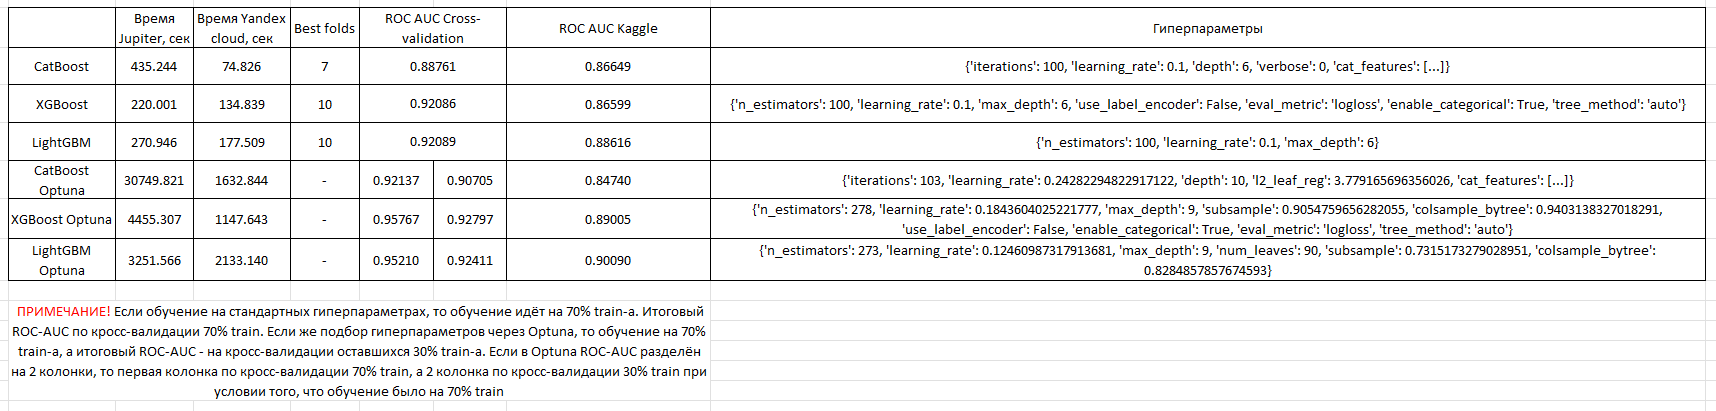

# **Задание 3 (2 балла)**

Попробуйте подойти к задаче как к поиску аномалий.

1) Поищите аномалии (фрод) различными рассмотренными в курсе методами и сделайте прогноз на тестовых данных.

Результатом также будет таблица:
* по строкам - методы поиска аномалий
* по столбцам - качество вашего решения на leaderboard

2) Попробуйте встроить поиск аномалий и их удаление в ML-пайплайн: найдите аномалии и что-нибудь с ними сделайте до обучения моделей (можно удалить их, а можно использовать в качестве дополнительных признаков - попробуйте разные стратегии). Результат проверьте на кросс-валидации и на лидерборде, сделайте выводы.

In [ ]:
import pandas as pd
import os
import numpy as np

INPUT_DIR = '.'

train_transaction = pd.read_csv(os.path.join(INPUT_DIR, 'train_transaction.csv'))
train_identity = pd.read_csv(os.path.join(INPUT_DIR, 'train_identity.csv'))
test_transaction = pd.read_csv(os.path.join(INPUT_DIR, 'test_transaction.csv'))
test_identity = pd.read_csv(os.path.join(INPUT_DIR, 'test_identity.csv'))
sample_submission = pd.read_csv(os.path.join(INPUT_DIR, 'sample_submission.csv'))
df_train = train_transaction.merge(train_identity, how='left', on='TransactionID')
df_test = test_transaction.merge(test_identity, how='left', on='TransactionID')
df_train.drop(['TransactionID', 'TransactionDT'], axis=1, inplace=True)
df_test.drop(['TransactionID', 'TransactionDT'], axis=1, inplace=True)
df_train.shape, df_test.shape

((417559, 432), (172981, 431))

Подойдём к задаче немного иначе. Поскольку нам нужно будет OHE(т.е. размерность dataframe-ов увеличится), удалим колонки в оригинальных таблицах, где пропусков больше 70%. Затем заполним пропуски, все категориальные столбцы переведём в тип = category, а все числовые колонки прогоним через StandartScaler

Применим OneClassSVM и IsolationForest

In [ ]:
df_test['isFraud'] = [2] * df_test.shape[0]
df_all = pd.concat([df_train, df_test], axis = 0)
df_all

,isFraud,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,0,68.50,W,13926,NaN,150.0,discover,142.0,credit,315.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,29.00,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,59.00,W,4663,490.0,150.0,visa,166.0,debit,330.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,50.00,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,50.00,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172976,2,49.00,W,6550,NaN,150.0,visa,226.0,debit,272.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
172977,2,39.50,W,10444,225.0,150.0,mastercard,224.0,debit,204.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
172978,2,30.95,W,12037,595.0,150.0,mastercard,224.0,debit,231.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
172979,2,117.00,W,7826,481.0,150.0,mastercard,224.0,debit,387.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print(f"Размерность df перед удалением: {df_all.shape}")

numerical_features = df_all.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = df_all.select_dtypes(include=['object', 'category']).columns.tolist()

print(f"Количество числовых столбцов перед удалением {len(numerical_features)}")
print(f"Количество категориальных столбцов перед удалением {len(categorical_features)}")

threshold = 0.7
missing_ratio = df_all.isnull().mean()
cols_to_drop = missing_ratio[missing_ratio > threshold].index

print(f"Столбцы, которые будут удалены (пропусков > {threshold*100}%): {list(cols_to_drop)}")

df_clean = df_all.drop(columns=cols_to_drop)

print(f"Размерность df_clean после удаления: {df_clean.shape}")

numerical_features = df_clean.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = df_clean.select_dtypes(include=['object', 'category']).columns.tolist()

print(f"Количество числовых столбцов после удаления {len(numerical_features)}")
print(f"Количество категориальных столбцов после удаления {len(categorical_features)}")

Размерность df перед удалением: (590540, 432)
Количество числовых столбцов перед удалением 401
Количество категориальных столбцов перед удалением 31
Столбцы, которые будут удалены (пропусков > 70.0%): ['dist2', 'R_emaildomain', 'D6', 'D7', 'D8', 'D9', 'D12', 'D13', 'D14', 'V138', 'V139', 'V140', 'V141', 'V142', 'V143', 'V144', 'V145', 'V146', 'V147', 'V148', 'V149', 'V150', 'V151', 'V152', 'V153', 'V154', 'V155', 'V156', 'V157', 'V158', 'V159', 'V160', 'V161', 'V162', 'V163', 'V164', 'V165', 'V166', 'V167', 'V168', 'V169', 'V170', 'V171', 'V172', 'V173', 'V174', 'V175', 'V176', 'V177', 'V178', 'V179', 'V180', 'V181', 'V182', 'V183', 'V184', 'V185', 'V186', 'V187', 'V188', 'V189', 'V190', 'V191', 'V192', 'V193', 'V194', 'V195', 'V196', 'V197', 'V198', 'V199', 'V200', 'V201', 'V202', 'V203', 'V204', 'V205', 'V206', 'V207', 'V208', 'V209', 'V210', 'V211', 'V212', 'V213', 'V214', 'V215', 'V216', 'V217', 'V218', 'V219', 'V220', 'V221', 'V222', 'V223', 'V224', 'V225', 'V226', 'V227', 'V228',

Заполним остальные пропуски так, как мы делали раньше, для категориальных столбцов сделаем OHE, а для числовых столбцов стандартизируем и разделим обратно данные на train и test

In [ ]:
# Для числовых признаков – заполнение средним значением
for col in numerical_features:
    if df_clean[col].isnull().sum() > 0:
        df_clean[col].fillna(df_clean[col].mean(), inplace=True)
# Для категориальных признаков – заполнение наиболее частым значением
for col in categorical_features:
    if df_clean[col].isnull().sum() > 0:
        df_clean[col].fillna(df_clean[col].mode()[0], inplace=True)

In [ ]:
for col in categorical_features:
    df_clean[col] = df_clean[col].astype('category')

In [ ]:
numerical_features.pop(numerical_features.index('isFraud'))
numerical_features

['TransactionAmt',
 'card1',
 'card2',
 'card3',
 'card5',
 'addr1',
 'addr2',
 'dist1',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'C6',
 'C7',
 'C8',
 'C9',
 'C10',
 'C11',
 'C12',
 'C13',
 'C14',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'D10',
 'D11',
 'D15',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'V29',
 'V30',
 'V31',
 'V32',
 'V33',
 'V34',
 'V35',
 'V36',
 'V37',
 'V38',
 'V39',
 'V40',
 'V41',
 'V42',
 'V43',
 'V44',
 'V45',
 'V46',
 'V47',
 'V48',
 'V49',
 'V50',
 'V51',
 'V52',
 'V53',
 'V54',
 'V55',
 'V56',
 'V57',
 'V58',
 'V59',
 'V60',
 'V61',
 'V62',
 'V63',
 'V64',
 'V65',
 'V66',
 'V67',
 'V68',
 'V69',
 'V70',
 'V71',
 'V72',
 'V73',
 'V74',
 'V75',
 'V76',
 'V77',
 'V78',
 'V79',
 'V80',
 'V81',
 'V82',
 'V83',
 'V84',
 'V85',
 'V86',
 'V87',
 'V88',
 'V89',
 'V90',
 'V91',
 'V92',
 'V93',
 'V94',
 'V95'

In [ ]:
from sklearn.preprocessing import StandardScaler

df_dummies_all = pd.get_dummies(df_clean, drop_first=True)
scaler = StandardScaler()
df_dummies_all[numerical_features] = scaler.fit_transform(df_dummies_all[numerical_features])

In [ ]:
df_train = df_dummies_all[df_dummies_all['isFraud'] < 2]
df_test = df_dummies_all[df_dummies_all['isFraud'] == 2]
df_train.shape, df_test.shape

((417559, 289), (172981, 289))

In [ ]:
import time
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import warnings
warnings.filterwarnings("ignore")

time0 = time.time()
X_train_models, X_val_models, y_train_models, y_val_models = train_test_split(
    df_train.drop(columns = ['isFraud']),
    df_train['isFraud'],
    test_size=0.2,
    random_state=42,
    stratify=df_train['isFraud']
)
time1 = time.time()
print(f'Разделение на train и val {time1 - time0} секунд')

Разделение на train и val 4.160985231399536 секунд


Применим OneClassSVM и IsolationForest

In [ ]:
from sklearn.svm import OneClassSVM
from sklearn.metrics import roc_auc_score

time0 = time.time()
ocsvm = OneClassSVM(nu=0.05, kernel="rbf", gamma=0.1)
ocsvm.fit(X_train_models)
time1 = time.time()
print(f"Время на обучение OneClassSVM {time1 - time0} секунд")

y_val_pred_ocsvm = ocsvm.predict(X_val_models)

y_val_pred_ocsvm = np.where(y_val_pred_ocsvm == 1, 0, 1)
y_val_pred_ocsvm
final_roc_auc = roc_auc_score(y_val_models, y_val_pred_ocsvm)
print(f"Финальный ROC-AUC на тесте: {final_roc_auc}")

In [ ]:
predictions = ocsvm.predict(df_test.drop(columns = ['isFraud']))
sub = pd.DataFrame({'TransactionID': sample_submission['TransactionID'], 'isFraud': predictions})
sub.to_csv("results/OneClassSVM.csv", index=False)

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import roc_auc_score

iso_forest = IsolationForest(contamination=0.05, random_state=42)
time0 = time.time()
iso_forest.fit(X_train_models)
time1 = time.time()
print(f"Время на обучение IsolationForest {time1 - time0} секунд")

y_val_pred_iso = iso_forest.predict(X_val_models)
y_val_pred_iso = np.where(y_val_pred_iso == 1, 0, 1)

final_roc_auc = roc_auc_score(y_val_models, y_val_pred_iso)
print(f"Финальный ROC-AUC: {final_roc_auc}")

Время на обучение IsolationForest 44.55404567718506 секунд
Финальный ROC-AUC: 0.6025349097494743


In [ ]:
predictions = iso_forest.predict(df_test.drop(columns = ['isFraud']))
sub = pd.DataFrame({'TransactionID': sample_submission['TransactionID'], 'isFraud': predictions})
sub.to_csv("results/ISO_forest.csv", index=False)

В итоге, OneClassSVM не получилось дождаться, а IsolationForest дал значение ROC-AUC на валидационной выборке равным 0.6, что не так хорошо :(


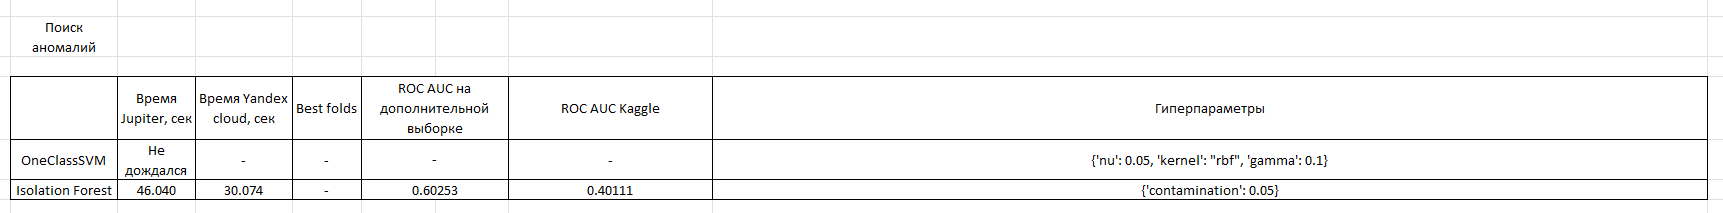

# **Задание 4 (1 балл)**

Сделайте кластеризацию различными способами. Результаты кластеризации используйте для улучшения ML-решений:

1) Номера кластеров закодируйте (OHE или target-encoding) и добавьте как новые признаки

2) При использовании DBSCAN / HDBSCAN предсказанный шум можно трактовать как найденную аномалию и также добавить ее как новый признак

Проведите различные эксперименты. Проверьте как эти подходы влияют на качество прогнозов по кросс-валидации и на лидерборде, сделайте выводы.

Проведём те же самые действия, но вставим в общий dataframe данные от кластеризаторов KMeans и DBSCAN

In [ ]:
import pandas as pd
import os
import numpy as np

INPUT_DIR = '.'

train_transaction = pd.read_csv(os.path.join(INPUT_DIR, 'train_transaction.csv'))
train_identity = pd.read_csv(os.path.join(INPUT_DIR, 'train_identity.csv'))
test_transaction = pd.read_csv(os.path.join(INPUT_DIR, 'test_transaction.csv'))
test_identity = pd.read_csv(os.path.join(INPUT_DIR, 'test_identity.csv'))
sample_submission = pd.read_csv(os.path.join(INPUT_DIR, 'sample_submission.csv'))
df_train = train_transaction.merge(train_identity, how='left', on='TransactionID')
df_test = test_transaction.merge(test_identity, how='left', on='TransactionID')
df_train.drop(['TransactionID', 'TransactionDT'], axis=1, inplace=True)
df_test.drop(['TransactionID', 'TransactionDT'], axis=1, inplace=True)
df_train.shape, df_test.shape

((417559, 432), (172981, 431))

In [ ]:
df_test['isFraud'] = [2] * df_test.shape[0]
df_all = pd.concat([df_train, df_test], axis = 0)
df_all

,isFraud,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,0,68.50,W,13926,NaN,150.0,discover,142.0,credit,315.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,29.00,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,59.00,W,4663,490.0,150.0,visa,166.0,debit,330.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,50.00,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,50.00,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172976,2,49.00,W,6550,NaN,150.0,visa,226.0,debit,272.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
172977,2,39.50,W,10444,225.0,150.0,mastercard,224.0,debit,204.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
172978,2,30.95,W,12037,595.0,150.0,mastercard,224.0,debit,231.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
172979,2,117.00,W,7826,481.0,150.0,mastercard,224.0,debit,387.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print(f"Размерность df перед удалением: {df_all.shape}")

numerical_features = df_all.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = df_all.select_dtypes(include=['object', 'category']).columns.tolist()

print(f"Количество числовых столбцов перед удалением {len(numerical_features)}")
print(f"Количество категориальных столбцов перед удалением {len(categorical_features)}")

threshold = 0.7
missing_ratio = df_all.isnull().mean()
cols_to_drop = missing_ratio[missing_ratio > threshold].index

print(f"Столбцы, которые будут удалены (пропусков > {threshold*100}%): {list(cols_to_drop)}")

df_clean = df_all.drop(columns=cols_to_drop)

print(f"Размерность df_clean после удаления: {df_clean.shape}")

numerical_features = df_clean.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = df_clean.select_dtypes(include=['object', 'category']).columns.tolist()

print(f"Количество числовых столбцов после удаления {len(numerical_features)}")
print(f"Количество категориальных столбцов после удаления {len(categorical_features)}")

Размерность df перед удалением: (590540, 432)
Количество числовых столбцов перед удалением 401
Количество категориальных столбцов перед удалением 31
Столбцы, которые будут удалены (пропусков > 70.0%): ['dist2', 'R_emaildomain', 'D6', 'D7', 'D8', 'D9', 'D12', 'D13', 'D14', 'V138', 'V139', 'V140', 'V141', 'V142', 'V143', 'V144', 'V145', 'V146', 'V147', 'V148', 'V149', 'V150', 'V151', 'V152', 'V153', 'V154', 'V155', 'V156', 'V157', 'V158', 'V159', 'V160', 'V161', 'V162', 'V163', 'V164', 'V165', 'V166', 'V167', 'V168', 'V169', 'V170', 'V171', 'V172', 'V173', 'V174', 'V175', 'V176', 'V177', 'V178', 'V179', 'V180', 'V181', 'V182', 'V183', 'V184', 'V185', 'V186', 'V187', 'V188', 'V189', 'V190', 'V191', 'V192', 'V193', 'V194', 'V195', 'V196', 'V197', 'V198', 'V199', 'V200', 'V201', 'V202', 'V203', 'V204', 'V205', 'V206', 'V207', 'V208', 'V209', 'V210', 'V211', 'V212', 'V213', 'V214', 'V215', 'V216', 'V217', 'V218', 'V219', 'V220', 'V221', 'V222', 'V223', 'V224', 'V225', 'V226', 'V227', 'V228',

In [ ]:
from sklearn.preprocessing import StandardScaler

# Для числовых признаков – заполнение средним значением
for col in numerical_features:
    if df_clean[col].isnull().sum() > 0:
        df_clean[col].fillna(df_clean[col].mean(), inplace=True)
# Для категориальных признаков – заполнение наиболее частым значением
for col in categorical_features:
    if df_clean[col].isnull().sum() > 0:
        df_clean[col].fillna(df_clean[col].mode()[0], inplace=True)
for col in categorical_features:
    df_clean[col] = df_clean[col].astype('category')

if 'isFraud' in numerical_features:
    numerical_features.pop(numerical_features.index('isFraud'))

df_dummies_all = pd.get_dummies(df_clean, drop_first=True)
scaler = StandardScaler()
df_dummies_all[numerical_features] = scaler.fit_transform(df_dummies_all[numerical_features])

In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
!pip install hdbscan -q
import hdbscan
import time

In [ ]:
# KMeans
time0 = time.time()
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_cluster = kmeans.fit_predict(df_dummies_all.drop(columns = ['isFraud']))
print(f"Затраченное время: {time.time() - time0}")



D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Затраченное время: 39.4517080783844


In [ ]:
# Агломеративная кластеризация
# agg = AgglomerativeClustering(n_clusters=2)
# agg_cluster = agg.fit_predict(df_dummies_all.drop(columns = ['isFraud']))

# MemoryError: Unable to allocate 1.27 TiB for an array with shape (174368450530,) and data type float64

In [ ]:
# DBSCAN
time0 = time.time()
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_cluster = dbscan.fit_predict(df_dummies_all.drop(columns = ['isFraud']))
print(f"Затраченное время: {time.time() - time0}")

Затраченное время: 2426.0183787345886


In [ ]:
# HDBSCAN
# time0 = time.time()
# clusterer = hdbscan.HDBSCAN(min_cluster_size=5)
# hdbscan_cluster = clusterer.fit_predict(df_dummies_all.drop(columns = ['isFraud']))
# print(f"Затраченное время: {time.time() - time0}")

# Слишком долго работало

In [ ]:
kmeans_cluster.shape, dbscan_cluster.shape, df_dummies_all.shape

((590540,), (590540,), (590540, 291))

In [ ]:
new_columns = pd.DataFrame({
    'kmeans_cluster': kmeans_cluster,
    'dbscan_cluster': dbscan_cluster
}, index=df_dummies_all.index)


df_dummies_all = df_dummies_all.copy()

In [ ]:
df_train = df_dummies_all[df_dummies_all['isFraud'] < 2]
df_test = df_dummies_all[df_dummies_all['isFraud'] == 2]
df_train.shape, df_test.shape

((417559, 291), (172981, 291))

In [ ]:
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import warnings
warnings.filterwarnings("ignore")

is_gpu = False

best_params_cat = {'iterations': 100,
                   'learning_rate': 0.1,
                   'depth': 6,
                   'verbose': 0}
cat_model_best = CatBoostClassifier(**best_params_cat)

time0 = time.time()
cat_model_best.fit(df_train.drop(columns = ['isFraud']), df_train['isFraud'])

print(f"Затраченное время: {time.time() - time0}")
predictions = cat_model_best.predict_proba(df_test.drop(columns = ['isFraud']))[:, 1]

sub = pd.DataFrame({'TransactionID': sample_submission['TransactionID'], 'isFraud': predictions})
sub.to_csv("results/CatBoost_best_with_clasters.csv", index=False)

Затраченное время: 13.005975484848022


In [ ]:
xgb_params = {'n_estimators': 278,
              'learning_rate': 0.1843604025221777,
              'max_depth': 9,
              'subsample': 0.9054759656282055,
              'colsample_bytree': 0.9403138327018291,
              'use_label_encoder': False,
              'eval_metric': 'logloss',
              'tree_method': 'gpu_hist' if is_gpu else 'auto'}
xgb_model_best = XGBClassifier(**xgb_params, random_state=42)
time0 = time.time()
xgb_model_best.fit(df_train.drop(columns = ['isFraud']), df_train['isFraud'])
print(f"Затраченное время: {time.time() - time0}")
predictions = xgb_model_best.predict_proba(df_test.drop(columns = ['isFraud']))[:, 1]

sub = pd.DataFrame({'TransactionID': sample_submission['TransactionID'], 'isFraud': predictions})
sub.to_csv("results/xgb_best_with_clasters.csv", index=False)

Затраченное время: 30.138542413711548


In [ ]:
lgb_params = {'n_estimators': 278,
              'learning_rate': 0.1843604025221777,
              'max_depth': 9,
              'subsample': 0.9054759656282055,
              'colsample_bytree': 0.9403138327018291,
              'use_label_encoder': False,
              'eval_metric': 'logloss',
              'tree_method': 'auto'}
if is_gpu:
    lgb_params['device'] = 'gpu'
lgb_model_best = LGBMClassifier(**lgb_params, random_state=42)

time0 = time.time()
lgb_model_best.fit(df_train.drop(columns = ['isFraud']), df_train['isFraud'])
print(f"Затраченное время: {time.time() - time0}")
predictions = lgb_model_best.predict_proba(df_test.drop(columns = ['isFraud']))[:, 1]

sub = pd.DataFrame({'TransactionID': sample_submission['TransactionID'], 'isFraud': predictions})
sub.to_csv("results/lightgbm_best_with_clasters.csv", index=False)

[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Info] Number of positive: 14721, number of negative: 402838
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.202121 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 16630
[LightGBM] [Info] Number of data points in the train set: 417559, number of used features: 286
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.035255 -> initscore=-3.309259
[LightGBM] [Info] Start training from score -3.309259
Затраченное время: 16.915990114212

##Выводы##
Сделал те же действия с датафреймом. Добавил данные от кластеризаторов KMeans и DBSCAN и загрузил результаты на Kaggle. Все результаты ниже

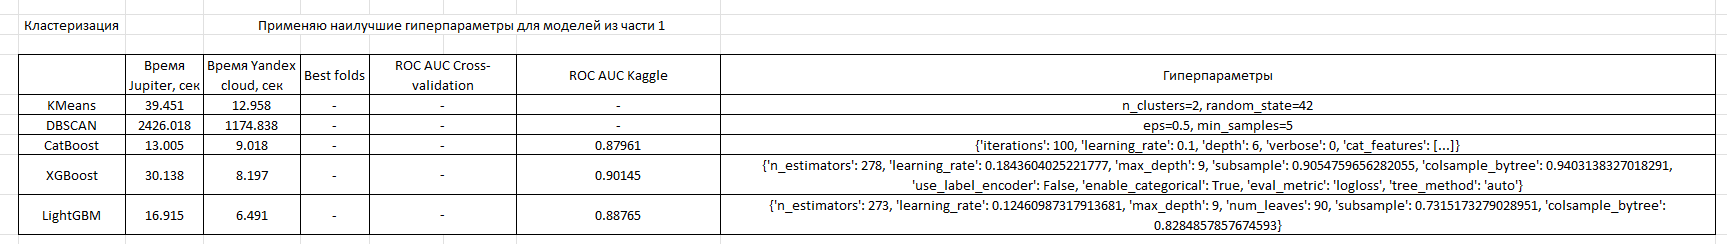

## **Задание 5 (1 балл)**

Примените какой-нибудь (один любой) AutoML фреймворк для решения поставленной задачи.

Отправьте AutoML-прогноз на kaggle и посмотрите на качество модели. Сделайте текстовые выводы.

##Примечание##
Запустить код в Jupiter Notebook у меня не удалось, поэтому запустил код в pycharm. Ниже привожу код, который работал в pycharm и вывод кода

Работал с библиотекой autogluon

In [ ]:
import pandas as pd
import os
import numpy as np
from sklearn.model_selection import train_test_split
from autogluon.tabular import TabularPredictor
from sklearn.metrics import roc_auc_score
import time
from sklearn.preprocessing import StandardScaler

time_zero = time.time()

INPUT_DIR = '.'

train_transaction = pd.read_csv(os.path.join(INPUT_DIR, 'train_transaction.csv'))
train_identity = pd.read_csv(os.path.join(INPUT_DIR, 'train_identity.csv'))
test_transaction = pd.read_csv(os.path.join(INPUT_DIR, 'test_transaction.csv'))
test_identity = pd.read_csv(os.path.join(INPUT_DIR, 'test_identity.csv'))
sample_submission = pd.read_csv(os.path.join(INPUT_DIR, 'sample_submission.csv'))
df_train = train_transaction.merge(train_identity, how='left', on='TransactionID')
df_test = test_transaction.merge(test_identity, how='left', on='TransactionID')
df_train.drop(['TransactionID', 'TransactionDT'], axis=1, inplace=True)
df_test.drop(['TransactionID', 'TransactionDT'], axis=1, inplace=True)

print(f"POINT 1. Прошло {time.time() - time_zero} секунд")

df_test['isFraud'] = [2] * df_test.shape[0]
df_all = pd.concat([df_train, df_test], axis = 0)

print(f"POINT 2. Прошло {time.time() - time_zero} секунд")

print(f"Размерность df перед удалением: {df_all.shape}")
numerical_features = df_all.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = df_all.select_dtypes(include=['object', 'category']).columns.tolist()
print(f"Количество числовых столбцов перед удалением {len(numerical_features)}")
print(f"Количество категориальных столбцов перед удалением {len(categorical_features)}")
threshold = 0.7
missing_ratio = df_all.isnull().mean()
cols_to_drop = missing_ratio[missing_ratio > threshold].index
print(f"Столбцы, которые будут удалены (пропусков > {threshold*100}%): {list(cols_to_drop)}")
df_clean = df_all.drop(columns=cols_to_drop)
print(f"Размерность df_clean после удаления: {df_clean.shape}")
numerical_features = df_clean.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = df_clean.select_dtypes(include=['object', 'category']).columns.tolist()
print(f"Количество числовых столбцов после удаления {len(numerical_features)}")
print(f"Количество категориальных столбцов после удаления {len(categorical_features)}")

print(f"POINT 3. Прошло {time.time() - time_zero} секунд")

# Для числовых признаков – заполнение средним значением
for col in numerical_features:
    if df_clean[col].isnull().sum() > 0:
        df_clean[col].fillna(df_clean[col].mean(), inplace=True)
# Для категориальных признаков – заполнение наиболее частым значением
for col in categorical_features:
    if df_clean[col].isnull().sum() > 0:
        df_clean[col].fillna(df_clean[col].mode()[0], inplace=True)
for col in categorical_features:
    df_clean[col] = df_clean[col].astype('category')

if 'isFraud' in numerical_features:
    numerical_features.pop(numerical_features.index('isFraud'))

print(f"POINT 4. Прошло {time.time() - time_zero} секунд")

df_dummies_all = pd.get_dummies(df_clean, drop_first=True)
scaler = StandardScaler()
df_dummies_all[numerical_features] = scaler.fit_transform(df_dummies_all[numerical_features])

print(f"POINT 5. Прошло {time.time() - time_zero} секунд")

df_train = df_dummies_all[df_dummies_all['isFraud'] < 2]
df_test = df_dummies_all[df_dummies_all['isFraud'] == 2]


df_train_tmp, df_val_tmp = train_test_split(df_train, test_size=0.3, random_state=42, stratify=df_train['isFraud'])
print(f"POINT 6. Прошло {time.time() - time_zero} секунд")
time0 = time.time()
predictor = TabularPredictor(label='isFraud', eval_metric='roc_auc').fit(
    df_train_tmp,
    time_limit=1800,
    presets='best_quality'
)
print(f"Затраченное время на обучение: {time.time() - time0} секунд")

pred_val = predictor.predict_proba(df_val_tmp.drop(columns=['isFraud']))

roc_auc = roc_auc_score(df_val_tmp['isFraud'], pred_val.iloc[:, 1])
print("ROC-AUC на валидационной выборке:", roc_auc)

pred_test = predictor.predict(df_test.drop(columns=['isFraud']))

sub = pd.DataFrame({
    'TransactionID': sample_submission['TransactionID'],
    'isFraud': pred_test
})
sub.to_csv("results/auto_ml.csv", index=False)


POINT 1. Прошло 21.408026933670044 секунд

POINT 2. Прошло 22.253031253814697 секунд

Размерность df перед удалением: (590540, 432)

Количество числовых столбцов перед удалением 401

Количество категориальных столбцов перед удалением 31

Столбцы, которые будут удалены (пропусков > 70.0%): ['dist2', 'R_emaildomain', 'D6', 'D7', 'D8', 'D9', 'D12', 'D13', 'D14', 'V138', 'V139', 'V140', 'V141', 'V142', 'V143', 'V144', 'V145', 'V146', 'V147', 'V148', 'V149', 'V150', 'V151', 'V152', 'V153', 'V154', 'V155', 'V156', 'V157', 'V158', 'V159', 'V160', 'V161', 'V162', 'V163', 'V164', 'V165', 'V166', 'V167', 'V168', 'V169', 'V170', 'V171', 'V172', 'V173', 'V174', 'V175', 'V176', 'V177', 'V178', 'V179', 'V180', 'V181', 'V182', 'V183', 'V184', 'V185', 'V186', 'V187', 'V188', 'V189', 'V190', 'V191', 'V192', 'V193', 'V194', 'V195', 'V196', 'V197', 'V198', 'V199', 'V200', 'V201', 'V202', 'V203', 'V204', 'V205', 'V206', 'V207', 'V208', 'V209', 'V210', 'V211', 'V212', 'V213', 'V214', 'V215', 'V216', 'V217', 'V218', 'V219', 'V220', 'V221', 'V222', 'V223', 'V224', 'V225', 'V226', 'V227', 'V228', 'V229', 'V230', 'V231', 'V232', 'V233', 'V234', 'V235', 'V236', 'V237', 'V238', 'V239', 'V240', 'V241', 'V242', 'V243', 'V244', 'V245', 'V246', 'V247', 'V248', 'V249', 'V250', 'V251', 'V252', 'V253', 'V254', 'V255', 'V256', 'V257', 'V258', 'V259', 'V260', 'V261', 'V262', 'V263', 'V264', 'V265', 'V266', 'V267', 'V268', 'V269', 'V270', 'V271', 'V272', 'V273', 'V274', 'V275', 'V276', 'V277', 'V278', 'V322', 'V323', 'V324', 'V325', 'V326', 'V327', 'V328', 'V329', 'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338', 'V339', 'id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08', 'id_09', 'id_10', 'id_11', 'id_12', 'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType', 'DeviceInfo']

Размерность df_clean после удаления: (590540, 224)

Количество числовых столбцов после удаления 211

Количество категориальных столбцов после удаления 13

POINT 3. Прошло 39.00202417373657 секунд

POINT 4. Прошло 41.79002356529236 секунд

POINT 5. Прошло 47.37904477119446 секунд

POINT 6. Прошло 50.1930513381958 секунд


.............


Затраченное время на обучение: 1799.7231013774872 секунд

ROC-AUC на валидационной выборке: 0.9618526294303801


# **Задание 6 (1 балл)**

Весь курс мы работали в Google Colab. Но всегда должны быть запасные варианты, где Вы будете обучать модели.

Среди вариантов есть:
* ваша локальная машина
* kaggle notebooks
* yandex cloud
и другие.

Кроме привычного Google Colab выберите из списка выше один любой альтернативный вариант и проведите эксперимент:

* Прогоните ваш лучший по качеству по результатам заданий 2-4 ML-пайплайн заново в Google Colab и с помощью библиотек (например, при помощи библиотеки time) замерьте время обучения и отдельно время инференса на тестовых данных

* Прогоните этот пайплайн на выбранном альтернативном сервисе/локальной машине и также замерьте время обучения и инференса.

Текстом напишите выводы: опишите, какое альтернативное место для обучения моделей Вы использовали? Прикрепите прямо в ноутбук скриншот с экраном кода в альтернативном сервисе/на локальной машине. Также в виде таблицы приведите сравнение времени обучения и инференса в колабе и в альтернативном месте. Сделайте выводы.

Я делал всю домашнюю работу в Jupiter Notebook и в Yandex Datasphere. В скриншотах выше представлен результат работы Datasphere. Также прикладываю скриншот работы в Datasphere

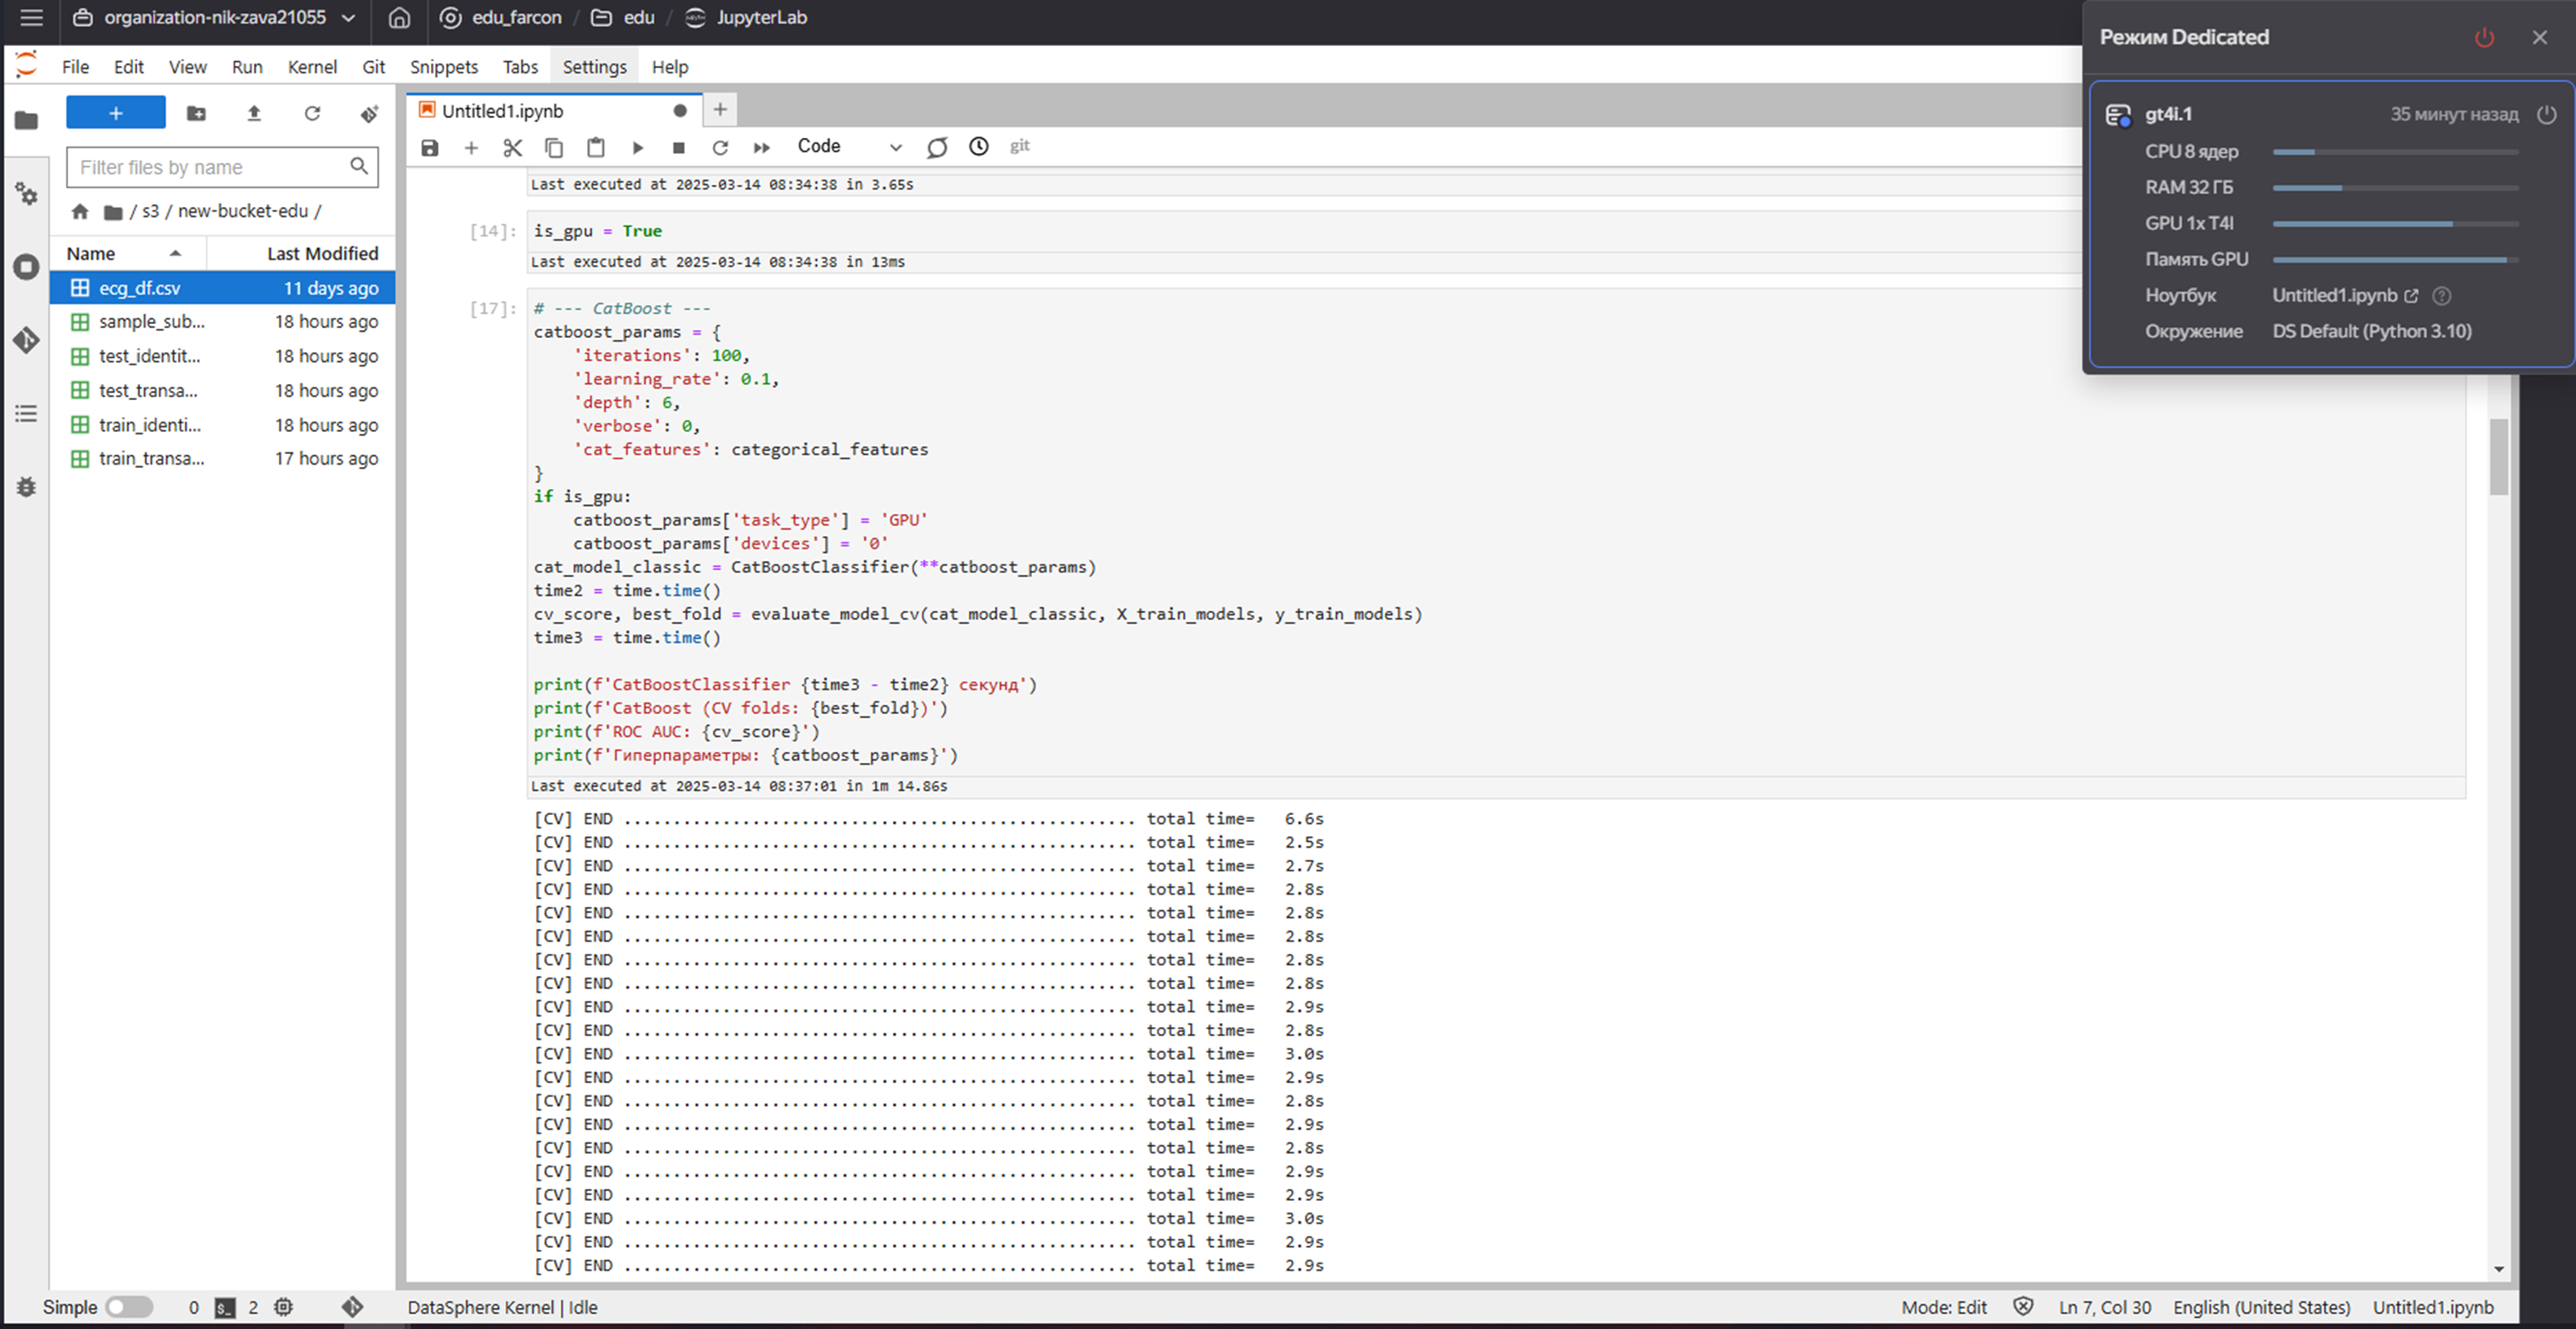

Как вывод могу сказать, что работа в Yandex Datasphere намного быстрее, поскольку появляется возможность обучать на видеокарте

# **Бонус: за Kaggle и стремление к хорошим скорам (2 балла)**

В этом домашнем задании Ваша цель - не просто выполнить шаги выше, но и построить максимально хорошую по качеству модель.

**К 10 вы можете получить до двух дополнительных баллов:**

* За попадание в топ-20% на private leaderboard — +1 дополнительный балл к оценке
* За попадание в топ-5 мест на private leaderboard — + еще один дополнительный балл к оценке (то есть суммарно 2 дополнительных балла)

**ВАЖНО!!!**

Эти баллы ставятся до мягкого дедлайна по соревнованию. После мягкого дедлайна лидерборд не обновляется, и дополнительные баллы не ставятся.

Успехов!

Ниже скриншот лучшего значения по public score

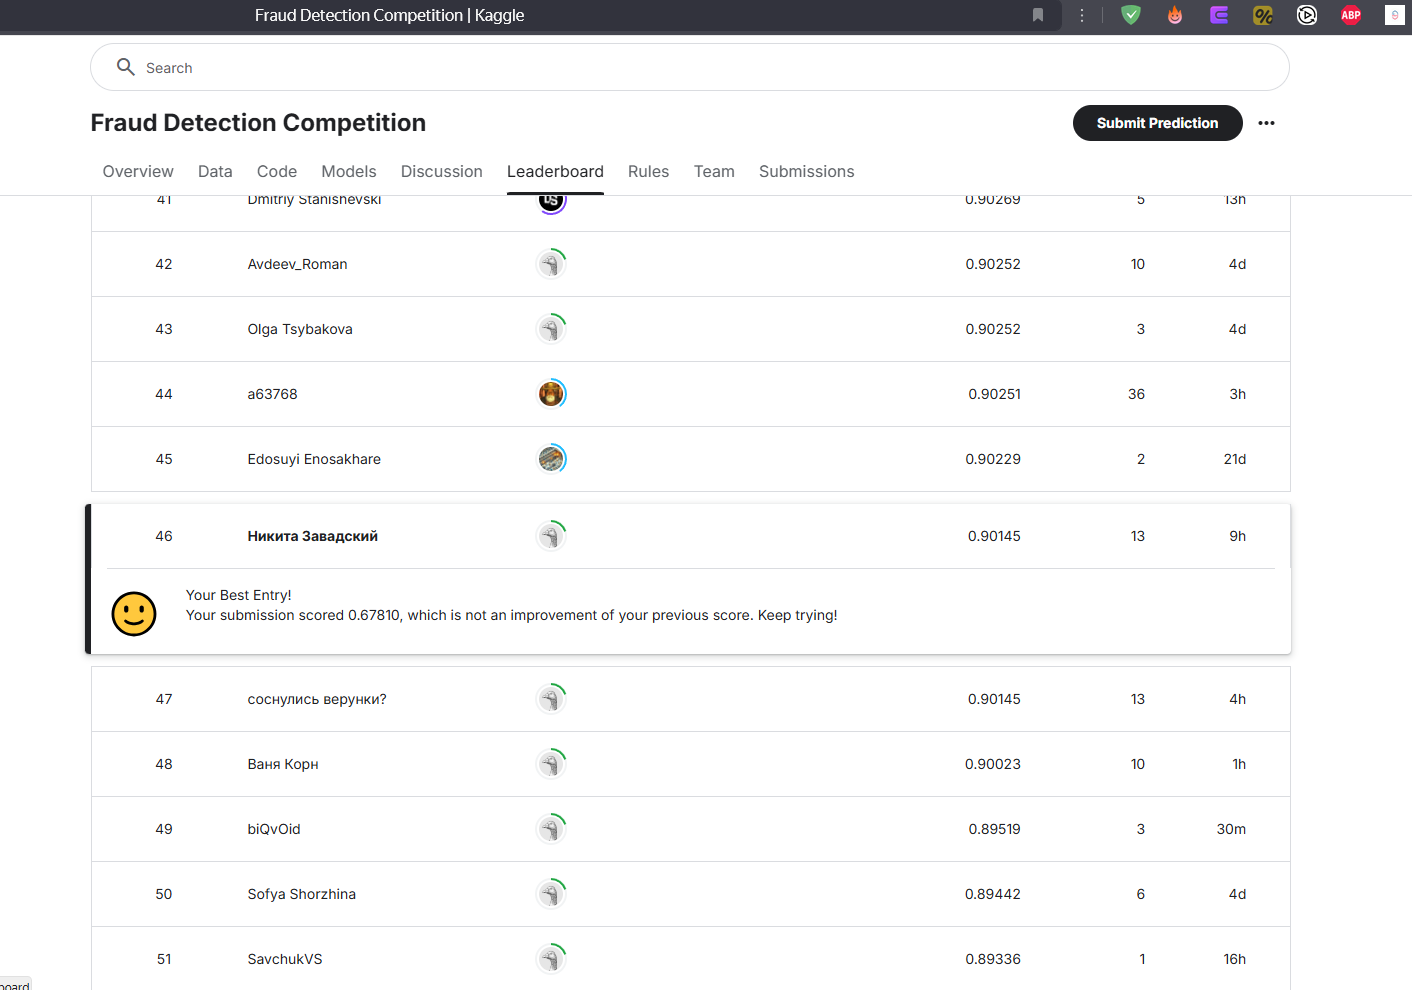